In [1]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import torch
import tifffile
import yaml
from torchio.transforms import Resize
from einops import rearrange

import napari

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.data.multiplex import extract_ome_tiff
from mushroom.data.visium import adata_from_visium, pixels_per_micron
from mushroom.visualization.utils import calculate_target_visualization_shape

In [5]:
config_filepath = '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/mushroom_outputs/multiplex/config_local.yaml'
outputs_filepath = '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/mushroom_outputs/multiplex/outputs.pt'


In [6]:
data = torch.load(outputs_filepath)
data.keys()

dict_keys(['recon_embs', 'recon_imgs', 'true_imgs', 'cluster_distances', 'cluster_distance_volume', 'cluster_centroids', 'cluster_ids'])

In [7]:
for k, v in data.items():
    print(k, v.shape)

recon_embs torch.Size([4, 1024, 60, 60])
recon_imgs torch.Size([4, 24, 1920, 1920])
true_imgs torch.Size([4, 24, 1920, 1920])
cluster_distances torch.Size([4, 60, 60, 20])
cluster_distance_volume torch.Size([30, 60, 60, 20])
cluster_centroids torch.Size([20, 1024])
cluster_ids torch.Size([4, 60, 60])


In [8]:
config = yaml.safe_load(open(config_filepath))
sections = config['sections']
sections

[{'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_visium.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 1},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 11},
 {'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s3_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/r

In [9]:
import mushroom.visualization.viewer as viewer

In [11]:
obj = viewer.MushroomViewer(config, data, downsample=.5)

In [12]:
obj.dtype_mapping

{'he': {'s0': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif',
  's3': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s3_he.tif'},
 'visium': {'s0': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_visium.h5ad',
  's3': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s3_visium.h5ad'},
 'multiplex': {'s1': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s1_multiplex.ome.tiff',
  's2': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s2_multiplex.ome.tiff',
  's4': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s4_multiplex.ome.tiff',
  's5': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s5_multiplex.ome.tiff'}}

In [13]:
obj.downsampled_shape

(960, 960, 17)

In [14]:
obj.positions

array([ 0,  0,  6, 11, 11, 17])

In [15]:
obj.fullres_size, obj.scaled_shape, obj.scaled_size, obj.downsampled_shape

((18643, 18378), (1920, 1920, 34), (1920, 1920), (960, 960, 17))

In [16]:
config['learner_kwargs'].keys()

dict_keys(['channel_mapping', 'num_workers', 'scale'])

In [17]:
p = obj.dtype_to_planes['visium']

(1108, 1108, 3)

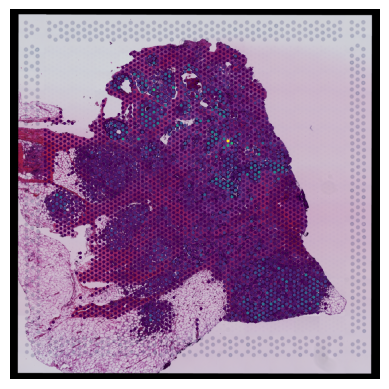

In [19]:
img = p.get_image('s0', marker='EPCAM')
img.shape

In [20]:
p = obj.dtype_to_planes['multiplex']

In [21]:
img = p.get_image('s1')
img.shape

(25, 1920, 1920)

In [23]:
config['learner_kwargs']

{'channel_mapping': {'BCA1': 'BCA1',
  'BCAL': 'BCAL',
  'Bap1 (D)': 'Bap1',
  'CD107a': 'CD107A',
  'CD11b': 'CD11b',
  'CD11b (D)': 'CD11b',
  'CD11b-(D)': 'CD11b',
  'CD11c': 'CD11c',
  'CD138': 'CD138',
  'CD163': 'CD163',
  'CD20': 'CD20',
  'CD20 (D)': 'CD20',
  'CD20-(D)': 'CD20',
  'CD20-Akoya': 'CD20',
  'CD3': 'CD3e',
  'CD31': 'CD31',
  'CD31 (D)': 'CD31',
  'CD31-(D)': 'CD31',
  'CD36': 'CD36',
  'CD36-(D)': 'CD36',
  'CD39': 'CD39',
  'CD3e': 'CD3e',
  'CD4': 'CD4',
  'CD4 (D)': 'CD4',
  'CD44': 'CD44',
  'CD45': 'CD45',
  'CD45 (D)': 'CD45',
  'CD45-(D)': 'CD45',
  'CD45RA': 'CD45RA',
  'CD45RO': 'CD45RO',
  'CD68': 'CD68',
  'CD68 (D)': 'CD68',
  'CD68-(D)': 'CD68',
  'CD8': 'CD8',
  'CD8a': 'CD8',
  'CK14': 'CK14',
  'CK14 (D)': 'CK14',
  'CK17': 'CK17',
  'CK17 (D)': 'CK17',
  'CK17-(D)': 'CK17',
  'CK19': 'CK19',
  'CK19 (D)': 'CK19',
  'CK19-(D)': 'CK19',
  'COX2': 'COX2',
  'COX6c (D)': 'COX6c',
  'CTLA4': 'CTLA4',
  'CTLA4 (D)': 'CTLA4',
  'CTLA4-(D)': 'CTLA4',
  '

In [301]:
p.border, p.scaled_size_nopad, p.scaled_size

([41, 28, 42, 28], (1864, 1837), (1920, 1920))

In [302]:
adata = next(iter(p.section_to_adata.values()))
adata

AnnData object with n_obs × n_vars = 3058 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial', 'spatial_viz'

In [303]:
d = next(iter(adata.uns['spatial'].values()))
d.keys()

dict_keys(['images', 'metadata', 'scalefactors'])

In [304]:
d['scalefactors']

{'fiducial_diameter_fullres': 243.84368374073196,
 'spot_diameter_fullres': 150.95085183950073,
 'tissue_hires_scalef': 0.10727887,
 'tissue_lowres_scalef': 0.032183662,
 'tissue_vizres_scalef': 0.1}

In [305]:
d['images']['hires'].shape, d['images']['vizres'].shape

((2000, 1972, 3), (1920, 1921, 3))

In [306]:
img = next(iter(adata.uns['spatial'].values()))['images']['vizres']
coords = adata.obsm['spatial_viz']

In [307]:
img.shape, coords

((1920, 1921, 3),
 array([[ 7300, 13814],
        [ 5461,  4180],
        [14571, 12870],
        ...,
        [ 5668,  6850],
        [ 8292,  5103],
        [ 2638,  6740]]))

DEBUG:PIL.TiffImagePlugin:Tiffinfo Keys: []
DEBUG:PIL.TiffImagePlugin:Tag 256, Type: 4, Value: 374
DEBUG:PIL.TiffImagePlugin:save: ImageWidth (256) - type: long (4) - value: (374,)
DEBUG:PIL.TiffImagePlugin:Tag 257, Type: 4, Value: 369
DEBUG:PIL.TiffImagePlugin:save: ImageLength (257) - type: long (4) - value: (369,)
DEBUG:PIL.TiffImagePlugin:Tag 258, Type: 3, Value: (8, 8, 8, 8)
DEBUG:PIL.TiffImagePlugin:save: BitsPerSample (258) - type: short (3) - value: (8, 8, 8, 8)
DEBUG:PIL.TiffImagePlugin:Tag 259, Type: 3, Value: 1
DEBUG:PIL.TiffImagePlugin:save: Compression (259) - type: short (3) - value: (1,)
DEBUG:PIL.TiffImagePlugin:Tag 262, Type: 3, Value: 2
DEBUG:PIL.TiffImagePlugin:save: PhotometricInterpretation (262) - type: short (3) - value: (2,)
DEBUG:PIL.TiffImagePlugin:Tag 273, Type: 4, Value: (0,)
DEBUG:PIL.TiffImagePlugin:save: StripOffsets (273) - type: long (4) - value: (0,)
DEBUG:PIL.TiffImagePlugin:Tag 277, Type: 3, Value: 4
DEBUG:PIL.TiffImagePlugin:save: SamplesPerPixel (2

(369, 374, 4)

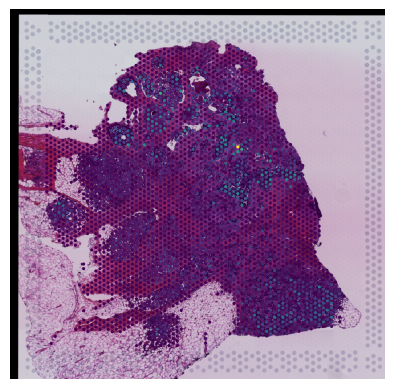

In [292]:
fp = '/Users/erikstorrs/Downloads/test.tif'

fig, ax = plt.subplots()
crop_coords = [0, obj.fullres_size[-2], 0, obj.fullres_size[-1]]
_ = sc.pl.spatial(adata, img_key='vizres', basis='spatial_viz', color='EPCAM',
                    crop_coord=crop_coords, show=False, colorbar_loc=None, ax=ax)
ax.axis('off')
ax.set_title('')
plt.savefig(fp, bbox_inches='tight', pad_inches=0.)
img = tifffile.imread(fp)
img.shape

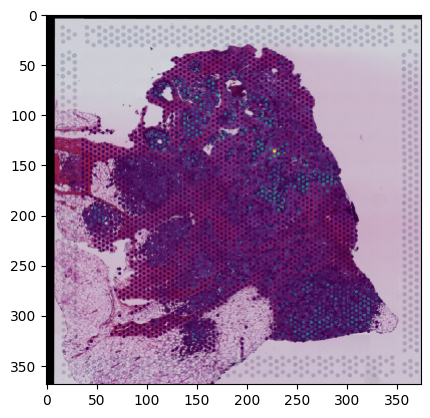

In [293]:
plt.imshow(img)

In [ ]:
x = np.array(fig.canvas.renderer.buffer_rgba())
x.shape

In [224]:
axs[0].get_rasterized()

False

In [225]:
ax = axs[0]

In [133]:
p.downsample_size

<generator object VisiumPlanes.__init__.<locals>.<genexpr> at 0x2c54d1e40>

In [15]:
config = yaml.safe_load(open(config_filepath))
sections = config['sections']
sections

[{'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_visium.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 1},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 11},
 {'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s3_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/r

In [33]:
s = sections[0]
fp = [entry['filepath'] for entry in s['data'] if entry['dtype']=='visium'][0]
adata = sc.read_h5ad(fp)
adata

DEBUG:h5py._conv:Creating converter from 3 to 5


AnnData object with n_obs × n_vars = 3058 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [38]:
scalefactors = next(iter(adata.uns['spatial'].values()))['scalefactors']
pixels_per_micron = scalefactors['spot_diameter_fullres'] / 65. # each spot is 65 microns wide
pixels_per_micron

2.3223207975307805

In [44]:
scalef = scalefactors['tissue_hires_scalef']
hires_shape = next(iter(adata.uns['spatial'].values()))['images']['hires'].shape
fullres_shape = (int(hires_shape[0] / scalef), int(hires_shape[1] / scalef))
fullres_shape

(18643, 18381)

In [53]:
step_size = pixels_per_micron * 5 * config['learner_kwargs']['scale']
z_max = int(step_size * np.max([entry['position'] for entry in sections]))
z_max

34

In [54]:
target_shape = (data['true_imgs'].shape[-2], data['true_imgs'].shape[-1], z_max)
target_shape

(1920, 1920, 34)

In [45]:
config.keys()

dict_keys(['chkpt_filepath', 'cluster_kwargs', 'dtype', 'learner_kwargs', 'sae_kwargs', 'sections', 'train_kwargs'])

In [ ]:
step_size = 

In [42]:
scalefactors

{'fiducial_diameter_fullres': 243.84368374073196,
 'spot_diameter_fullres': 150.95085183950073,
 'tissue_hires_scalef': 0.10727887,
 'tissue_lowres_scalef': 0.032183662}

In [58]:
from ome_types import from_xml
tif = tifffile.TiffFile('/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s2_multiplex.ome.tiff')
ome = from_xml(tif.ome_metadata)
im = ome.images[0]

In [61]:
im.pixels.physical_size_x

2.3223207975307805

In [63]:
sections[0]['data']

[{'dtype': 'he',
  'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif'},
 {'dtype': 'visium',
  'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_visium.h5ad'}]

In [79]:
adata

AnnData object with n_obs × n_vars = 3058 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [82]:
d = next(iter(adata.uns['spatial'].values()))
d.keys()

dict_keys(['images', 'metadata', 'scalefactors'])

In [83]:
d['scalefactors']

{'fiducial_diameter_fullres': 243.84368374073196,
 'spot_diameter_fullres': 150.95085183950073,
 'tissue_hires_scalef': 0.10727887,
 'tissue_lowres_scalef': 0.032183662}

In [84]:
d['images'].keys()

dict_keys(['hires', 'lowres'])

In [86]:
pixels_per_micron = pixels_per_micron(adata)
pixels_per_micron

2.3223207975307805

In [87]:
scale = .1
downsample = .1
downsample_ppm = pixels_per_micron * scale * downsample
downsample_ppm

0.023223207975307806

In [89]:
tif.ome_metadata

'<?xml version="1.0" encoding="UTF-8"?><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd" UUID="urn:uuid:13a44b72-411d-11ee-ab10-ac1f6b9e3060"  Creator="tifffile.py 2023.8.12"><Image ID="Image:0" Name="Image0"><Pixels ID="Pixels:0" DimensionOrder="XYZCT" Type="uint8" SizeX="18370" SizeY="18640" SizeZ="1" SizeC="25" SizeT="1" PhysicalSizeX="2.3223207975307805" PhysicalSizeXUnit="µm" PhysicalSizeY="2.3223207975307805" PhysicalSizeYUnit="µm"><Channel ID="Channel:0:0" SamplesPerPixel="1" Name="DAPI"><LightPath/></Channel><Channel ID="Channel:0:1" SamplesPerPixel="1" Name="CD8"><LightPath/></Channel><Channel ID="Channel:0:2" SamplesPerPixel="1" Name="Her2 (D)"><LightPath/></Channel><Channel ID="Channel:0:3" SamplesPerPixel="1" Name="GATA3 (D)"><LightPath/></Channel><Channel ID="Channel:0:4" SamplesP

In [91]:
im.pixels.size_x, im.pixels.size_y

(18370, 18640)

In [92]:
tif = tifffile.TiffFile(
    '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif'
)

In [94]:
p = next(iter(tif.pages))
p

<tifffile.TiffPage 0 @8>

In [95]:
p.shape

(18643, 18378, 3)

In [96]:
scalefactors

{'fiducial_diameter_fullres': 243.84368374073196,
 'spot_diameter_fullres': 150.95085183950073,
 'tissue_hires_scalef': 0.10727887,
 'tissue_lowres_scalef': 0.032183662}